In [1]:
from instruction_reader import InstructionReader
from parse import parse_sexprs
import random

import tensorflow.compat.v1 as tf
import os
import pdb
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from tf_optimizer import TfOptimizer
from parse import parse_sexprs
from instruction_reader import InstructionReader

from util_graph_gen import *
from graph_generator import *


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)
tf.disable_v2_behavior()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import argparse
import pdb

from builder import build
from util import DEFAULTS
import copy

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def'),

args = parser.parse_args()
args = vars(args)


In [3]:
args['enforce_goals'] = True

In [4]:
from importlib import reload

import util_graph_gen
reload(util_graph_gen)
from util_graph_gen import *

import graph_generator
reload(graph_generator)
from graph_generator import *

Processing instructions...: 100%|██████████| 1/1 [00:00<00:00, 26.80it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3) right-tri (P3)


Found 1 models


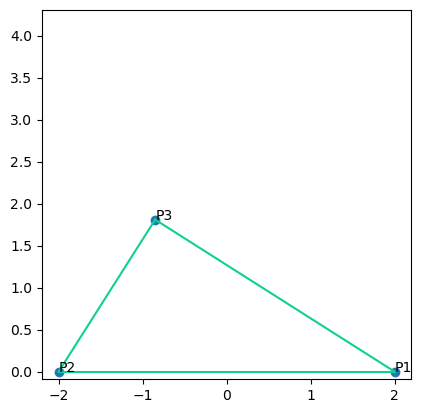

Processing instructions...: 100%|██████████| 3/3 [00:00<00:00, 29.33it/s]


######################## Lines drawn above ########################
['(param (P1 P2 P3) (right-tri P3) )']

INPUT INSTRUCTIONS:
sample (P1 P2 P3) right-tri (P3)
parameterize C1 circle
assert (coll P1 P3 P2)



Processing instructions...:  67%|██████▋   | 2/3 [00:00<00:00, 16.48it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3) right-tri (P3)
parameterize L1 (through-l P2)
define C1 ((mixtilinear-incircle P2 P1 P3))


Processing instructions...: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]




Found 1 models


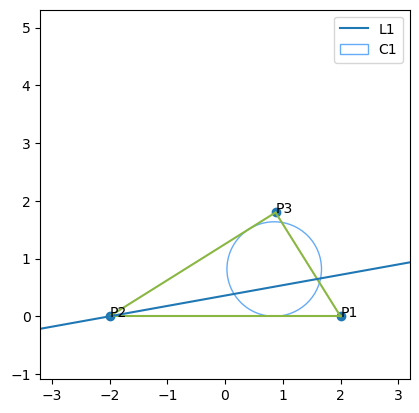

Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]


######################## Lines drawn above ########################
['(param (P1 P2 P3) (right-tri P3) )', '(param L1 line (through P2))', '(define C1 circle (mixtilinear-incircle P2 P1 P3))']

INPUT INSTRUCTIONS:
sample (P1 P2 P3) right-tri (P3)
parameterize L1 (through-l P2)
define C1 ((mixtilinear-incircle P2 P1 P3))
parameterize L2 (through-l P2)
parameterize P4 (on-seg P1 P3)
sample (P5 P6 P7) acute-tri ()


Processing instructions...:  33%|███▎      | 2/6 [00:00<00:00, 19.19it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3) right-tri (P3)
parameterize L1 (through-l P2)
define C1 ((mixtilinear-incircle P2 P1 P3))
define P4 ((amidp-same P1 P2 P3))
define P5 ((incenter P4 P2 P3))
define L2 ((isotomic P3 P5 P2 P4))


Processing instructions...: 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]




Found 1 models


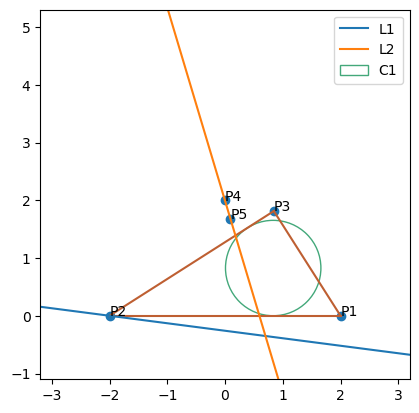


######################## Lines drawn above ########################
['(param (P1 P2 P3) (right-tri P3) )', '(param L1 line (through P2))', '(define C1 circle (mixtilinear-incircle P2 P1 P3))', '(define P4 point (amidp-same P1 P2 P3))', '(define P5 point (incenter P4 P2 P3))', '(define L2 line (isotomic P3 P5 P2 P4))']



In [5]:
num_steps = 6
readers, figs = generate_graph(args, num_steps)

In [9]:
for item in readers:
    print(item)

    for pr_item in item.problem_lines:
        print(pr_item)
    print('')

(param (P1 P2 P3) (right-tri P3) )

(param (P1 P2 P3) (right-tri P3) )
(param L1 line (through P2))
(define C1 circle (mixtilinear-incircle P2 P1 P3))

(param (P1 P2 P3) (right-tri P3) )
(param L1 line (through P2))
(define C1 circle (mixtilinear-incircle P2 P1 P3))
(define P4 point (amidp-same P1 P2 P3))
(define P5 point (incenter P4 P2 P3))
(define L2 line (isotomic P3 P5 P2 P4))
(param C2 circle )



Processing instructions...:  40%|████      | 2/5 [00:00<00:00, 17.03it/s]

INPUT INSTRUCTIONS:
sample (P1 P2 P3) right-tri (P3)
parameterize L1 (through-l P2)
define C1 ((mixtilinear-incircle P2 P1 P3))
define P4 ((amidp-same P1 P2 P3))
define P5 ((incenter P4 P2 P3))


Processing instructions...: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]




Found 1 models


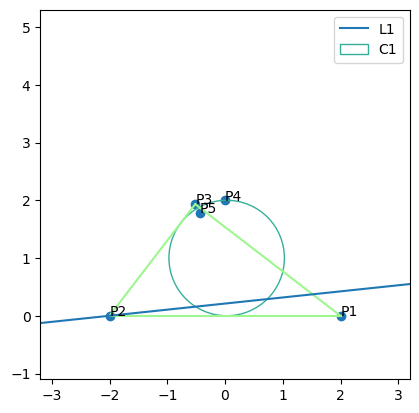

In [10]:
#lines = ['(param (P1 P2 P3) (right-tri P1) )']
lines = readers[-1].problem_lines[:5]

reader = InstructionReader(lines)
fig = solve_draw(args, reader)